<a href="https://colab.research.google.com/github/courtneytumolac/Data-Science/blob/main/Copy_of_Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how much time you'll spend studying on a given day, using the amount of sleep you got the night before as a predictor.

If this seems to easy, then add another variable or two (test tomorrow? activity after school?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

**Task2**:

What is a decision tree? How do they work?

Decision trees are flowcharts but each node can only have one "parent" node, although it can have many children. There is also the "root" node which has no parents.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

The depth is the layers of the tree, or how many generations of children the root node has. A tree is too deep if there are not enough data points for more complexity, and it's not deep enough if

**Task4:**

How are BART models similar and different from a decision tree?

**Task5**:

Why would we use a BART model instead of a decision tree?

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

!pip install pymc-bart
!pip install preliz

import pymc_bart as pmb
import preliz as pz
import seaborn as sns

In [ ]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()

Output()

Output()

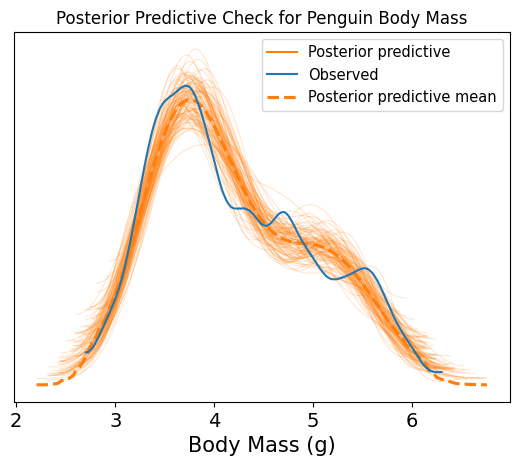

In [ ]:
features = ["flipper_length", "bill_depth", "bill_length"]
X = penguins[features].to_numpy()
Y = penguins["body_mass"].to_numpy()

with pm.Model() as model_penguins:
    s = pm.HalfNormal("s", 500)
    μ_ = pmb.BART("μ_", X, Y, m=50)
    y = pm.Normal("y", mu=μ_, sigma=s, observed=Y)
    idata_penguins = pm.sample(compute_convergence_checks=False)

pm.sample_posterior_predictive(idata_penguins, model_penguins, extend_inferencedata=True)

ax = az.plot_ppc(idata_penguins, num_pp_samples=100, colors=["C1", "C0", "C1"])
ax.set_title("Posterior Predictive Check for Penguin Body Mass")
ax.set_xlabel("Body Mass (g)")
plt.show()

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.